#Input



1.   Upload Image
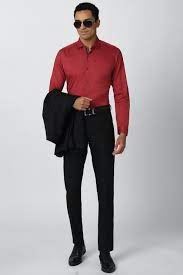






# Choose Product for Search

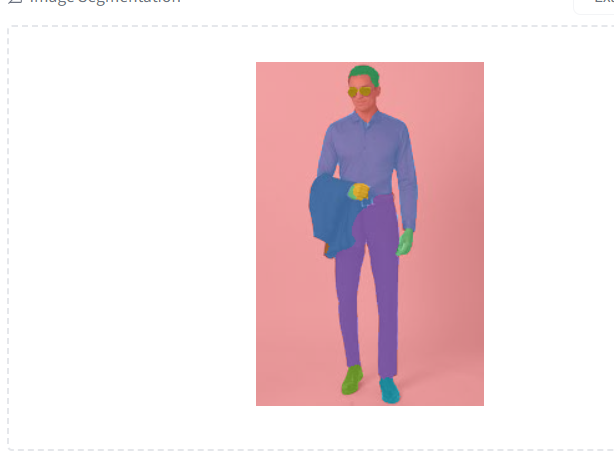


# Generate Text Prompt from




* **Social Media** : Conducting trend analysis from social media platforms such as Twitter, Instagram, and Facebook through the utilization of their respective Application Programming Interfaces (APIs). This involves data extraction, processing, and statistical analysis to identify and comprehend emerging trends and patterns within the social media landscape.
* **User insights** : Based on location(pincode):  allowed voltage, battery life, service center.
* **Based on time of year** : Diwali, Christmas, vacation, competition(world cup) etc.
* **customer profiles** : Creating customer profiles and preferences by leveraging historical order data and browsing behavior analysis. Additionally, employing entity mining techniques on existing product descriptions and reviews to extract valuable insights and derive various other customer-related information.








# Prompt refinement:
A prompt refinement is needed in this context to ensure its logical alignment with the accompanying image.
**e.x.** voltage, battery life not required for clothing’s.


*   We can utilize image captioning/description or visual QA approach.
*   Topic Modelling.




# Developing multi-model embeddings for both text and image data.

In [1]:
%pip install --quiet --upgrade diffusers transformers accelerate invisible_watermark mediapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.1/989.1 kB 7.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.3 MB/s eta 0:00:00


In [8]:
from diffusers.utils import load_image
import mediapy as media
import random
import sys
import torch

from diffusers import DiffusionPipeline

In [10]:
use_refiner = True

In [13]:
pipe = DiffusionPipeline.from_pretrained(
    "feature-extraction"
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
    )

if use_refiner:
  refiner = DiffusionPipeline.from_pretrained(
      "stabilityai/stable-diffusion-xl-refiner-1.0",
      text_encoder_2=pipe.text_encoder_2,
      vae=pipe.vae,
      torch_dtype=torch.float16,
      use_safetensors=True,
      variant="fp16",
  )

  refiner = refiner.to("cuda")

  pipe.enable_model_cpu_offload()
else:
  pipe = pipe.to("cuda")

Couldn't connect to the Hub: 401 Client Error. (Request ID: Root=1-64fb5646-3827629031ce2a3004a00b5f;a785a136-70d1-474b-82a5-5ac3ae62b7b9)

Repository Not Found for url: https://huggingface.co/api/models/feature-extractionrunwayml/stable-diffusion-v1-5.
Please make sure you specified the correct `repo_id` and `repo_type`.
If you are trying to access a private or gated repo, make sure you are authenticated.
Invalid username or password..
Will try to load from local cache.


OSError: ignored

In [11]:
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/sdxl-img2img.png"

init_image = load_image(url).convert("RGB")
prompt = "a dog catching a frisbee in the jungle wearing sweater"
# image = pipeline(prompt, image=init_image,

In [12]:
# prompt = "a solid color shirt of brand nike"
seed = random.randint(0, sys.maxsize)

images = pipe(
    prompt = prompt,
    output_type = "latent" if use_refiner else "pil",
    generator = torch.Generator("cuda").manual_seed(seed),
    ).images

if use_refiner:
  images = refiner(
      prompt = prompt,
      image = init_image,
      ).images

print(f"Prompt:\t{prompt}\nSeed:\t{seed}")
media.show_images(images)
images[0].save("output.jpg")

NameError: ignored

# Perform a search using vector embeddings for existing products, utilizing technologies like Weaviate, Vertex AI, or frameworks that implement a Retrieval-Augmented Generation (RAG) approach.

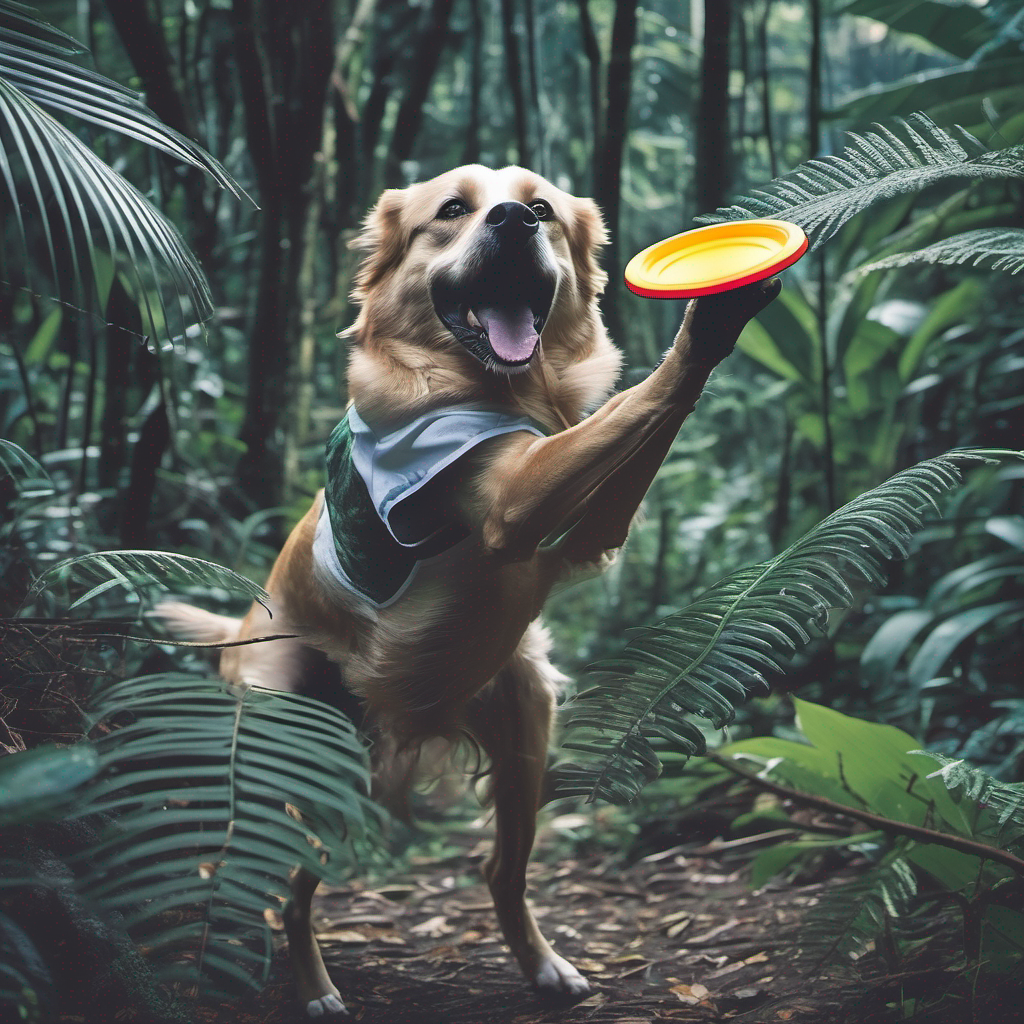

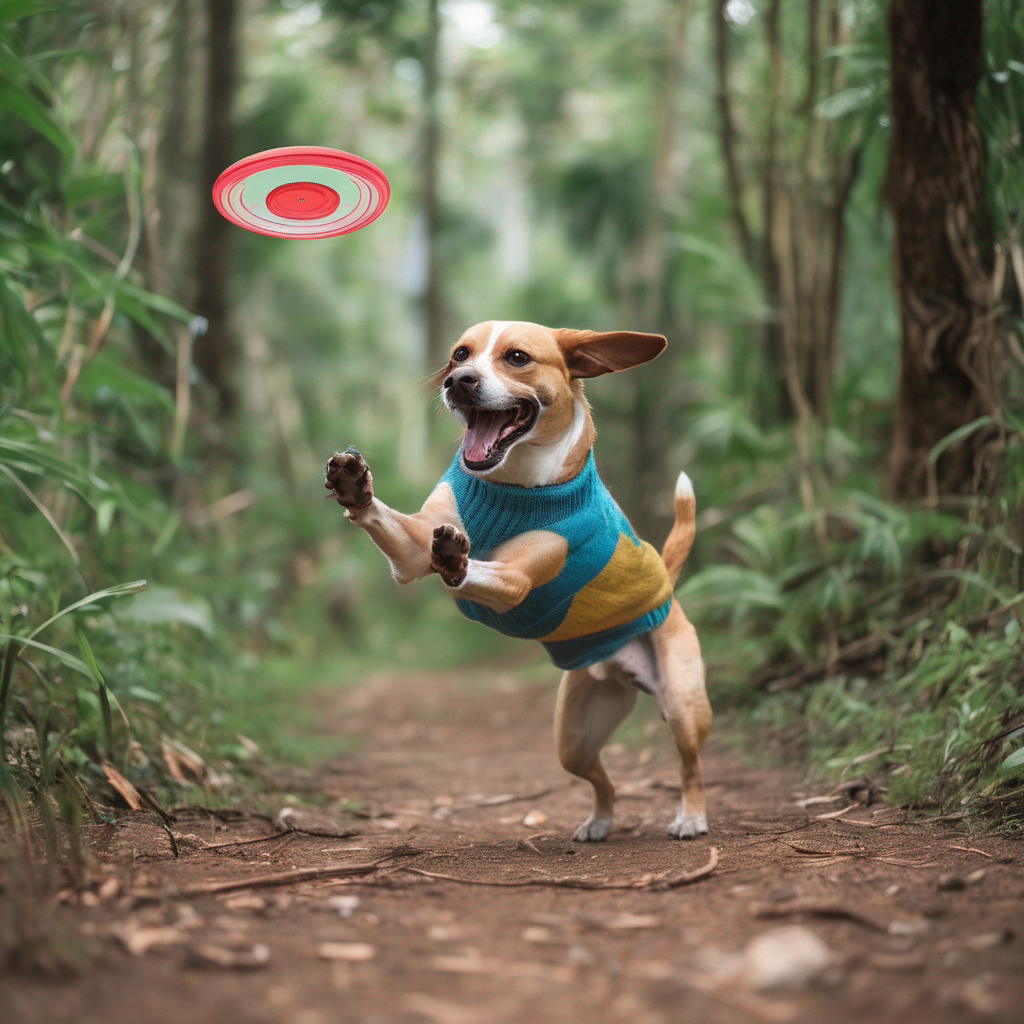